In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
# libraries import
import numpy as np
import pandas as pd
from datetime import datetime
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import display, Image, HTML
from scipy.stats import pearsonr
from tabulate import tabulate
from prettytable import PrettyTable

In [2]:
df_suicide = pd.read_csv("https://raw.githubusercontent.com/djetishi/BINA/main/Data/suicide.csv", na_values=[''])
df_happiness = pd.read_csv("https://raw.githubusercontent.com/djetishi/BINA/main/Data/happiness.csv", na_values=[''])
df_unemployment = pd.read_csv("https://raw.githubusercontent.com/djetishi/BINA/main/Data/unemployment_rate.csv", na_values=[''])

In [4]:
# Spalten und Beschreibungen definieren
spalten_suicide = df_suicide.columns
beschreibungen_suicide = ['Land', 'Jahr der Datenerfassung', 'Geschlecht', 'Alterskategorie',
                  'Totale Anzahl der Suizide', 'Bevölkerungsgrösse', 'Suizidrate pro 100,000 Einwohner', 'Kombination aus Jahr und Land',
                  'Index der menschlichen Entwicklung', 'BIP pro Jahr in US-Dollar', 'BIP pro Einwohner in US-Dollar', 'Generationenbezeichnung']

# Spalten und Beschreibungen definieren
spalten_happiness = df_happiness.columns
beschreibungen_happiness = ['Land', 'Region', 'Jahr', 'Lebensleiter (wo man sich aktuell einordnet)',
                  'BIP pro Einwohner in US-Dollar', 'Sozialer Support (ob jemand da ist, wenn es brenzlig wird)', 'Gesundheitserwartung (Erwartung gesunder Lebensjahre)',
                  'Freiheit Lebensentscheidungen zu treffen', 'Grosszügigkeit', 'Korruptionswahrnehmung', 'Positiver Affekt (Lachen, Spass haben und interessante Dinge tun)',
                            'Negativer Affekt (Sorge, Traurigkeit und Wut)', 'Vertrauen in die nationale Regierung']

# Spalten und Beschreibungen definieren
spalten_unemployment = df_unemployment.columns[:6]
beschreibungen_unemployment = ['Land', 'Abkürzung des Landes', 'Name des Indikators', 'Werte für das Jahr 1991',
                  'Werte für das Jahr 1992', 'weiterführend für alle Jahre bis 2023']

# Tabelle erstellen
tabelle_suicide = pd.DataFrame({'Spalten': spalten_suicide, 'Beschreibung': beschreibungen_suicide})
tabelle_happiness = pd.DataFrame({'Spalten': spalten_happiness, 'Beschreibung': beschreibungen_happiness})
tabelle_unemployment = pd.DataFrame({'Spalten': spalten_unemployment, 'Beschreibung': beschreibungen_unemployment})

# Konvertieren in HTML-Strings
html_suicide = tabelle_suicide.to_html()
html_happiness = tabelle_happiness.to_html()
html_unemployment = tabelle_unemployment.to_html()

# HTML-Strings kombinieren mit Flexbox-Layout
combined_html = f"""
<div style='display: flex; justify-content: space-between;'>
    <div style='width: 25%;'>{html_suicide}</div>
    <div style='width: 30%;'>{html_happiness}</div>
    <div style='width: 30%;'>{html_unemployment}</div>
</div>
"""

# Anzeigen der kombinierten HTML
display(HTML(combined_html))

,Spalten,Beschreibung
0,country,Land
1,year,Jahr der Datenerfassung
2,sex,Geschlecht
3,age,Alterskategorie
4,suicides_no,Totale Anzahl der Suizide
5,population,Bevölkerungsgrösse
6,suicides/100k pop,"Suizidrate pro 100,000 Einwohner"
7,country-year,Kombination aus Jahr und Land
8,HDI for year,Index der menschlichen Entwicklung
9,gdp_for_year ($),BIP pro Jahr in US-Dollar


In [ ]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(tabelle_suicide,tabelle_happiness)

,Spalten,Beschreibung
0,country,Land
1,year,Jahr der Datenerfassung
2,sex,Geschlecht
3,age,Alterskategorie
4,suicides_no,Totale Anzahl der Suizide
5,population,Bevölkerungsgrösse
6,suicides/100k pop,"Suizidrate pro 100,000 Einwohner"
7,country-year,Kombination aus Jahr und Land
8,HDI for year,HDI
9,gdp_for_year ($),BIP pro Jahr in US-Dollar


In [ ]:
# Calculate statistics using describe() method
describe_stats = df_suicide.describe()
# Convert describe() output to a formatted table with left-aligned numeric values
describe_table = tabulate(describe_stats, headers='keys', tablefmt='fancy_grid', numalign='left')
#------------------------------------------------------------------------------------------------------------------
# Calculate statistics using describe() method
describe_Hstats = df_happiness.describe()
# Convert describe() output to a formatted table with left-aligned numeric values
describe_Htable = tabulate(describe_Hstats, headers='keys', tablefmt='fancy_grid', numalign='left')
#------------------------------------------------------------------------------------------------------------------
# Calculate statistics using describe() method
describe_Ustats = df_unemployment.describe()
# Convert describe() output to a formatted table with left-aligned numeric values
describe_Utable = tabulate(describe_Ustats, headers='keys', tablefmt='fancy_grid', numalign='left')
#------------------------------------------------------------------------------------------------------------------
# Ergebnisse ausgeben
print("Basis-Statistiken aus dem rohen Dataset zu Suiziden: ")
print(describe_table)
print("\nBasis-Statistiken aus dem rohen Dataset zu Happiness: ")
print(describe_Htable)
print("\nBasis-Statistiken aus dem rohen Dataset zur Arbeitlosenrate: ")
print(describe_Utable)

Basis-Statistiken aus dem rohen Dataset zu Suiziden: 
╒═══════╤════════╤═══════════════╤══════════════╤═════════════════════╤════════════════╤══════════════════════╕
│       │ year   │ suicides_no   │ population   │ suicides/100k pop   │ HDI for year   │ gdp_per_capita ($)   │
╞═══════╪════════╪═══════════════╪══════════════╪═════════════════════╪════════════════╪══════════════════════╡
│ count │ 31756  │ 30556         │ 31756        │ 31756               │ 12300          │ 31756                │
├───────┼────────┼───────────────┼──────────────┼─────────────────────┼────────────────┼──────────────────────┤
│ mean  │ 2003.4 │ 237.136       │ 7.21745e+06  │ 11.7167             │ 0.793666       │ 17589                │
├───────┼────────┼───────────────┼──────────────┼─────────────────────┼────────────────┼──────────────────────┤
│ std   │ 9.7606 │ 867.956       │ 5.79932e+07  │ 21.5909             │ 0.0974799      │ 19464.9              │
├───────┼────────┼───────────────┼──────────────┼─

Die Tabellen zeigen verschiedene Basisstatistiken aus den rohen Datensätzen. Diese Basisstatistiken bieten einen ersten Einblick in die Verteilung und Streuung der Daten in den Datensätzen. Weitere Analyse und Bereinigung sind notwendig, um die Daten für fortgeschrittene Analyse oder Modellierung vorzubereiten.
Zunächst werden die jeweiligen Attribute kurz erläutert:
* count: Dies zeigt die Anzahl der Datensätze in jeder Spalte.
* mean: Der Durchschnittswert jeder Spalte wird angegeben.
* min: Das Minimum jeder Spalte wird angegeben.
* 25%: Das 25. Perzentil, auch bekannt als Quartil 1 (Q1), gibt den Wert an, unter dem 25% der Daten liegen.
* 50%: Das 50. Perzentil, auch bekannt als Median, gibt den Wert an, unter dem 50% der Daten liegen.
* 75%: Das 75. Perzentil, auch bekannt als Quartil 3 (Q3), gibt den Wert an, unter dem 75% der Daten liegen.
* max: Das Maximum jeder Spalte wird angegeben.
* std: Die Standardabweichung jeder Spalte wird angegeben.

Folgend gibt es eine kurze Zusammenfassung der wichtigsten Daten pro Dataset.

**Dataset Suizide:**
Die Spalte *suicides_no* zeigt eine breite Streuung, wie durch die hohe Standardabweichung und der grosse Unterschied zwischen dem Minimum und Maximum angezeigt wird.
Die Spalte *population* variiert ebenfalls stark, wie durch die hohe Standardabweichung und den grossen Bereich zwischen Minimum und Maximum dargestellt wird.
Die Spalte *suicides/100k* zeigt eine geringere Streuung, jedoch mit einem höheren Mittelwert im Vergleich zu den Quartilen.
Die BIP pro Jahr und per Einwohner weisen eine grosse Streuung auf, was auf erhebliche Unterschiede in den Werten zwischen den Ländern hinweisen könnte.

**Dataset Happiness:**
Die Anzahl der Datensätze variiert zwischen den jeweiligen Spalten, was auf fehlende Werte oder Datenlücken hinweisen kann.
Die Durchschnittswerte der verschiedenen Variablen liegen in unterschiedlichen Bereichen. Zum Beispiel liegt der durchschnittliche *Life Ladder* bei etwa 5,5, hingegen derjenige bei *Positive Affect* lediglich bei 0.652143.
Die Spanne der Daten, gemessen am Minimum und Maximum, ist ebenfalls variabel. Zum Beispiel reicht der Wert der *Life Ladder* von einem Minimum von etwa 1,28 bis zu einem Maximum von etwa 8,02.
Die verschiedenen Variablen weisen diverse Streuungen auf. Einige sind eher moderat, während andere eine geringe Streuung aufweisen.

**Dataset Arbeitlosenraten:**
Über alle Spalten hinweg gesehen, sind die Anzahl der Datensätze fast überall gleich, mit einer sehr leichten Abweichung im letzten Jahr, was durchaus ein Konsitentes Dataset wiederspiegelt.
Die Standardabweichung zeigt, dass es eine beträchtliche Streuung in den Arbeitslosenquoten gibt, was darauf hinweist, dass die Arbeitslosigkeit in verschiedenen Jahren stark variieren kann.
Beim Minimum und Maximum ist ersichtlich, dass es Jahre mit niedrigen aber auch hohen Arbeitslosenraten gibt.
Die mittlere Arbeitslosenquote variiert über die Jahre, wobei sie zu Beginn der 2000er Jahren eher hoch ist und dann im Laufe der Zeit tendenziell abnimmt.


In [ ]:
# Farbcodes definieren
class colors:
    RED = '\033[91m'
    END = '\033[0m'
#------------------------------------------------------------------------------------------------------------------------
# Count missing values per column for each DataFrame
missing_values_suicide_before = df_suicide.isna().sum()
missing_values_happiness_before = df_happiness.isna().sum()
missing_values_unemployment_before = df_unemployment.isna().sum()

# Create pretty tables for each DataFrame
table_suicide_before = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_suicide_before.items():
    table_suicide_before.add_row([col, val])

table_happiness_before = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_happiness_before.items():
    table_happiness_before.add_row([col, val])

table_unemployment_before = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_unemployment_before.items():
    table_unemployment_before.add_row([col, val])

# Print pretty tables side by side
text1 = "VOR"
print("Anzahl leerer Felder pro Spalte für jedes Dataset " + colors.RED + text1 + colors.END + " Datenbereinigung:")
print(tabulate([
    [table_suicide_before.get_string(), table_happiness_before.get_string(), table_unemployment_before.get_string()]
], tablefmt='plain'))

Anzahl leerer Felder pro Spalte für jedes Dataset VOR Datenbereinigung:
+--------------------+------------------------+  +-----------------------------------+------------------------+  +----------------+------------------------+
|      Spalten       | Anzahl fehlender Werte |  |              Spalten              | Anzahl fehlender Werte |  |    Spalten     | Anzahl fehlender Werte |
+--------------------+------------------------+  +-----------------------------------+------------------------+  +----------------+------------------------+
|      country       |           0            |  |            Country Name           |           0            |  |  Country Name  |           0            |
|        year        |           0            |  |         Regional Indicator        |          112           |  |  Country Code  |           0            |
|        sex         |           0            |  |                Year               |           0            |  | Indicator Name |           0

Die oben stehende Tabelle zeigt die Anzahl leerer Felder pro Spalte für jedes Dataset vor der Datenbereinigung auf.

Das Dataset zu den Suizidinformationen ist bereits sehr gut, und weisst nur leere Felder in den Spalten *suicides_no* und *HDI for year* aus. Da die Spalte *HDI for year* später nicht benötigt wird, kann diese komplett ausgeschlossen werden. Die fehlenden Werte in der Spalte *suicides_no* können ebenfalls ignoriert werden, da diese aus den Jahren 2017-2020 ist und ausserhalb unseres Fokus sind.

Beim Dataset zu den Arbeitslosenraten ist sehr schnell ersichtlich das durchgehen durch das ganze Dataset die Anzahl der fehlenden Werte über alle Jahre hinweg gleich ist. Demzufolge haben gewisse Länder in der Liste keine Werte. Diese Länder werden in der Datenbereinigung entfernt.

Im Dataset zu den Happiness Faktoren gibt es mehrere Spalten mit fehlenden Werten. Folgende Spalten werden für die weitere Bearbeitung nicht berücksichtigt und können somit ingoriert werden:

*   Regional Indicator
*   Life Ladder
*   Log GDP Per Capita
*   Social Support
*   Healthy Life Expectancy At Birth
*   Perceptions Of Corruption

Die verbleibenden Spalten besitzen fehlende Werte. Dieses Dataset wird in der Datenbereingung so gut wie möglich von diesen Spalten / Zeilen befreit um eine möglichst gute Datengrundlage zu erhalten.

Fehlende Werte in einem Dataset können dazu führen, dass Analysen unvollständig oder verzerrt sind, da wichtige Informationen fehlen, die für die Interpretation der Daten entscheidend sein können.

In [ ]:
# 1. Clean-up df_suicide
# drop unnessecary columns
to_drop = ['country-year', 'HDI for year']
# check whether the column exists and if so drop it
for col in to_drop:
    if col in df_suicide.columns:
        df_suicide.drop(columns=[col], inplace=True)

#rename column
df_suicide = df_suicide.rename(columns={'suicides/100k pop': 'suicides/100k', 'gdp_per_capita ($)':'gdp_per_capita', ' gdp_for_year ($) ': 'gdp_for_year'})

# Zuerst in String umwandeln
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].astype(str)
# Dann Tausendertrennzeichen entfernen und in Float umwandeln
#print(df_suicide)
#print(df_suicide['gdp_for_year'].dtypes)
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].str.replace(',', '').astype(float)
# Dann in Integer umwandeln
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].astype(int)

# Umwandeln von float nach Int für die suicides_no Spalte
df_suicide['suicides_no'] = df_suicide['suicides_no'].fillna(0).astype(int)

# Convert year column to datetime format
df_suicide['year'] = pd.to_datetime(df_suicide['year'], format='%Y')

# check column data types
#df_suicide.info()

# Extract only the year and update the 'year' column
df_suicide['year'] = pd.to_datetime(df_suicide['year'].dt.year, format='%Y')

# confirm if data type is still correct
#df_suicide.info()

# Create datetime objects for the start and end years
start_year = datetime.datetime(2005, 1, 1)
end_year = datetime.datetime(2015, 12, 31)

# Filter the DataFrame for years between 2005 and 2021
dfc_suicide = df_suicide[(df_suicide['year'] >= start_year) & (df_suicide['year'] <= end_year)]

# ----------------------------------------------------------------------------------------------------

# 2. Clean-up df_happiness
# drop unnessecary columns
to_drop = ['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life ', 'Expectancy At Birth ', 'Perceptions Of Corruption', 'Regional Indicator','Healthy Life Expectancy At Birth']
# check whether the column exists and if so drop it
for col in to_drop:
    if col in df_happiness.columns:
        df_happiness.drop(columns=[col], inplace=True)

#rename column
df_happiness = df_happiness.rename(columns={'Year': 'year', 'Country Name':'country'})

# Convert year column to datetime format
df_happiness['year'] = pd.to_datetime(df_happiness['year'], format='%Y')

# check column data types
#df_happiness.info()

# Extract only the year and update the 'year' column
df_happiness['year'] = pd.to_datetime(df_happiness['year'].dt.year, format='%Y')

# confirm if data type is still correct
#df_happiness.info()

# Create datetime objects for the start and end years
start_year = datetime.datetime(2005, 1, 1)
end_year = datetime.datetime(2015, 12, 31)

# Filter the DataFrame for years between 2005 and 2021
dfc_happiness = df_happiness[(df_happiness['year'] >= start_year) & (df_happiness['year'] <= end_year)]

# ----------------------------------------------------------------------------------------------------

# 3. Clean-up df_unemployment
# drop unnessecary columns (in this case filtering the right years)
to_drop = ['Indicator Name', '1991', '1992','1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003', '2004', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
# check whether the column exists and if so drop it
for col in to_drop:
    if col in df_unemployment.columns:
        df_unemployment.drop(columns=[col], inplace=True)

#rename column
df_unemployment = df_unemployment.rename(columns={'Country Name': 'country'})

# check column data types
#df_unemployment.info()

# Entfernen von Zeilen ohne Wert in der Spalte 2005-2015
dfc_unemployment = df_unemployment.dropna(subset=['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])


# Display all datasets head
print("Head of DataFrame Suicide:")
display(dfc_suicide.head())

print("\nHead of DataFrame Happiness:")
display(dfc_happiness.head())

print("\nHead of DataFrame Unemployment:")
display(dfc_unemployment.head())

Anzahl fehlende Werte pro Spalte je Dataset

In [ ]:
# Farbcodes definieren
class colors:
    RED = '\033[91m'
    END = '\033[0m'
#------------------------------------------------------------------------------------------------------------------------
# Count missing values per column for each DataFrame
missing_values_suicide = dfc_suicide.isna().sum()
missing_values_happiness = dfc_happiness.isna().sum()
missing_values_unemployment = dfc_unemployment.isna().sum()

# Create pretty tables for each DataFrame
table_suicide = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_suicide.items():
    table_suicide.add_row([col, val])

table_happiness = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_happiness.items():
    table_happiness.add_row([col, val])

table_unemployment = PrettyTable(['Spalten', 'Anzahl fehlender Werte'])
for col, val in missing_values_unemployment.items():
    table_unemployment.add_row([col, val])

# Print pretty tables side by side
text2 = "NACH"
print("Anzahl leerer Felder pro Spalte für jedes Dataset " + colors.RED + text2 + colors.END + " Datenbereinigung:")
print(tabulate([
    [table_suicide.get_string(), table_happiness.get_string(), table_unemployment.get_string()]
], tablefmt='plain'))

Anzahl leerer Felder pro Spalte für jedes Dataset NACH Datenbereinigung:
+----------------+------------------------+  +-----------------------------------+------------------------+  +--------------+------------------------+
|    Spalten     | Anzahl fehlender Werte |  |              Spalten              | Anzahl fehlender Werte |  |   Spalten    | Anzahl fehlender Werte |
+----------------+------------------------+  +-----------------------------------+------------------------+  +--------------+------------------------+
|    country     |           0            |  |              country              |           0            |  |   country    |           0            |
|      year      |           0            |  |                year               |           0            |  | Country Code |           0            |
|      sex       |           0            |  |    Freedom To Make Life Choices   |           25           |  |     2005     |           0            |
|      age       |   

In den obenstehenden Tabellen sind nun fehlenden Werte der Datasets pro Spalte aufgelistet.

Das erste Dataset weist nach der Bereinigung keinerlei fehlende Werte mehr auf und ist somit sehr gut vorbereitet für die weitere Verarbeitung. Dasselbe gilt auch für das dritte Dataset, welches ebenfalls keine fehlenden Werte für unseren Scope aufweisen.

Im mitteleren Dataset zu den Happiness Faktoren gibt es selbst nach der Bereinigung vereinzelte fehlende Daten. Da diese jedoch kein Muster aufweisen und alle fehlenden Werte unter 9% von der ganzen Spaltenanzahl sind, werden diese nicht weiter bearbeitet.

Die Datenbereinigung hat also dazu beigetragen, die Qualität der Daten zu verbessern und fehlende Werte zu reduzieren.

Vergleich Anzahl Unique Länder pro Dataset Vor-NACH Datenbereinigung

In [ ]:
# Anzahl VOR Bereinigung
unique_countries_count = df_suicide['country'].nunique()
unique_countries_count_H = df_happiness['country'].nunique()
unique_countries_count_U = df_unemployment['country'].nunique()
#Anzahl NACH Bereinigung
afterDC_unique_countries_count = dfc_suicide['country'].nunique()
afterDC_unique_countries_count_H = dfc_happiness['country'].nunique()
afterDC_unique_countries_count_U = dfc_unemployment['country'].nunique()

#Tabelle erstellen
unique_countries_counts = [
    ["Dataset 1 (Suizide)", unique_countries_count, afterDC_unique_countries_count],
    ["Dataset 2 (Happiness)", unique_countries_count_H, afterDC_unique_countries_count_H],
    ["Dataset 3 (Arbeitlosigkeit)", unique_countries_count_U, afterDC_unique_countries_count_U]
]

# Ausgabe der Tabelle
print(tabulate(unique_countries_counts, headers=["Dataset", "Anzahl eindeutiger Länder VOR Datenbereinigung", "Anzahl eindeutiger Länder NACH Datenbereinigung"], tablefmt="fancy_grid"))

╒═════════════════════════════╤══════════════════════════════════════════════════╤═══════════════════════════════════════════════════╕
│ Dataset                     │   Anzahl eindeutiger Länder VOR Datenbereinigung │   Anzahl eindeutiger Länder NACH Datenbereinigung │
╞═════════════════════════════╪══════════════════════════════════════════════════╪═══════════════════════════════════════════════════╡
│ Dataset 1 (Suizide)         │                                              114 │                                                96 │
├─────────────────────────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ Dataset 2 (Happiness)       │                                              165 │                                               163 │
├─────────────────────────────┼──────────────────────────────────────────────────┼───────────────────────────────────────────────────┤
│ Dataset 3 (Arbeitlosigkeit) │                        

Die Tabelle zeigt die Anzahl der eindeutigen Länder in allen Datensätzen **vor** und **nach** der Datenbereinigung.

Für *Dataset 1 (Suizide)* gab es vor der Datenbereinigung 114 eindeutige Länder, während nach der Bereinigung diese Zahl auf 96 reduziert wurde.

Bei *Dataset 2 (Happiness)* wurden vor der Datenbereinigung 165 eindeutige Länder identifiziert. Nach der Bereinigung blieb die Anzahl mit 163 nahezu gleich.

Im Fall von *Dataset 3 (Arbeitslosigkeit)* wurden vor der Datenbereinigung 266 eindeutige Länder verzeichnet. Nach der Bereinigung wurde diese Zahl auf 235 reduziert.

Die Datenbereinigung hat dazu beigetragen, die Anzahl der eindeutigen Länder in den meisten Datensätzen zu reduzieren. Somit konnten die Qualität und Konsistenz der Daten für die Weiterverarbeitung verbessert werden.

##1. Suicide Mortality Rate


In [ ]:
# import suicide mortality rate.csv
smr_df = pd.read_csv('https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/Suicide%20mortality%20rate.csv')
# drop unnessecary columns
to_drop = ['IND_UUID', 'IND_NAME', 'IND_CODE', 'DIM_TIME_TYPE', 'DIM_AGE', 'DIM_VALUE_TYPE', 'DIM_PUBLISH_STATE_CODE']
df_clean = smr_df.drop(to_drop, axis='columns')
# rename columns
df_clean = df_clean.rename(columns={'GEO_NAME_SHORT': 'COUNTRY', 'DIM_TIME':'YEAR', 'DIM_SEX':'SEX'})
# Filter out rows where column 'SEX' does not equal 'Total'
df_filtered = df_clean[df_clean['SEX'] == 'Total']
# Filter out only the values older than Year XY - not working
df_filtered = df_filtered[(df_filtered['YEAR'] >= 2000) & (df_filtered['YEAR'] <= 2018)]
df_filtered.head()

,DIM_GEO_CODE_M49,COUNTRY,YEAR,SEX,VALUE_NUMERIC,VALUE_NUMERIC_LOWER,VALUE_NUMERIC_UPPER
0,4,Afghanistan,2000,Total,4.91,2.79,8.0200
8,953,Africa,2000,Total,9.21,5.70,13.7952
10,784,United Arab Emirates,2000,Total,8.60,5.27,13.1537
12,28,Antigua and Barbuda,2000,Total,1.94,1.34,2.6700
14,24,Angola,2000,Total,8.71,5.04,13.7053


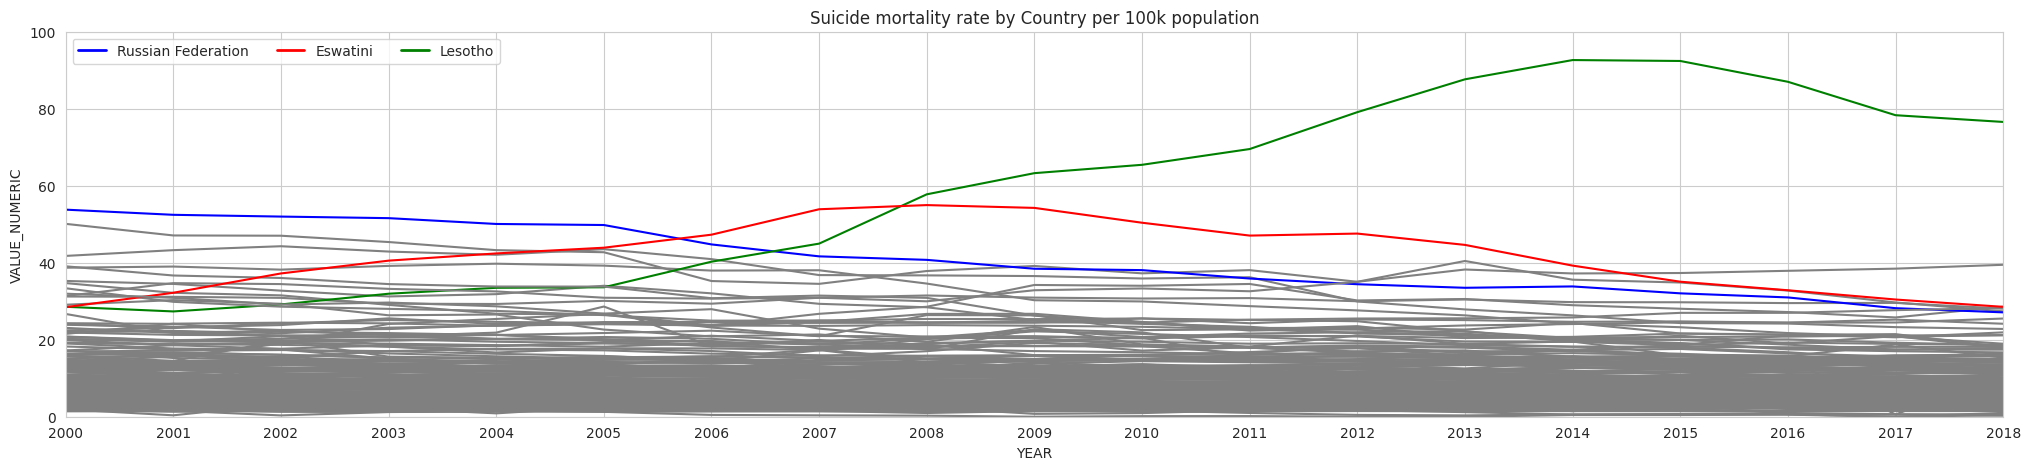

In [ ]:
# Plotting
sns.set_style("whitegrid")  # Set the style
plt.figure(figsize=(25, 5))  # Set the figure size

# Define colors for specific countries (biggest three)
color_dict = {'Russian Federation': 'blue', 'Eswatini': 'red', 'Lesotho': 'green'}

# Loop through unique countries and plot a line for each, set color for biggest three
for country in df_filtered['COUNTRY'].unique():
    country_data = df_filtered[df_filtered['COUNTRY'] == country]
    if country in color_dict:
        plt.plot(country_data['YEAR'], country_data['VALUE_NUMERIC'], label=country, color=color_dict[country])
    else:
        plt.plot(country_data['YEAR'], country_data['VALUE_NUMERIC'], label=country, color='gray')

# Display country names next to the lines for the specified countries
''' for country in ['Russian Federation', 'Eswatini', 'Lesotho']:
    country_data = df_filtered[df_filtered['COUNTRY'] == country]
    plt.text(country_data['YEAR'].iloc[-1] + 0.1, country_data['VALUE_NUMERIC'].iloc[-1], country, fontsize=10, color=color_dict.get(country, 'black'))
'''
# Add title and labels
plt.title('Suicide mortality rate by Country per 100k population')
plt.xlabel('YEAR')
plt.ylabel('VALUE_NUMERIC')

# Set intervals on the x-axis (every 1 year in this example)
plt.xticks(range(min(df_filtered['YEAR']), max(df_filtered['YEAR'])+1, 1))

# Remove empty space before 2000 and after 2018
plt.xlim(2000, 2018)

# Set intervals, max, and min on the y-axis
plt.ylim(0, 100)

# Create legend handles with correct colors
legend_handles = [Line2D([0], [0], color='blue', lw=2),
                  Line2D([0], [0], color='red', lw=2),
                  Line2D([0], [0], color='green', lw=2)]

# Add legend for the three specified countries
legend_labels = ['Russian Federation', 'Eswatini', 'Lesotho']
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', ncol=3)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=90)

# Show plot
plt.show()

##2. Unemployment Data

In [ ]:
# import global unemployment data.csv
gud_df = pd.read_csv('https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/global_unemployment_data.csv')
# drop unnessecary columns
drop = ['indicator_name']
gud_clean = gud_df.drop(drop, axis='columns')
# rename columns
gud_clean = gud_clean.rename(columns={'country_name': 'COUNTRY'})
gud_clean.head()

,COUNTRY,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [ ]:
female_data = gud_clean[gud_clean['sex'] == 'Female']

# Select only the columns representing the years
year_columns = [col for col in female_data.columns if col.isdigit()]

# Calculate the average unemployment rate for females per year
f_avg_unemployment_per_year = female_data[year_columns].mean()

# Create a DataFrame with columns for 'Year' and 'Average Unemployment Rate'
f_avg_unemployment_per_year = pd.DataFrame({
    'Year': f_avg_unemployment_per_year.index,  # Use the index as 'Year'
    'AUR': f_avg_unemployment_per_year.values  # Values as 'Average Unemployment Rate'
})

print(f_avg_unemployment_per_year)


male_data = gud_clean[gud_clean['sex'] == 'Male']

# Select only the columns representing the years
year_columns = [col for col in female_data.columns if col.isdigit()]

# Calculate the average unemployment rate for males per year
m_avg_unemployment_per_year = male_data[year_columns].mean()

# Create a DataFrame with columns for 'Year' and 'Average Unemployment Rate'
m_avg_unemployment_per_year = pd.DataFrame({
    'Year': m_avg_unemployment_per_year.index,  # Use the index as 'Year'
    'AUR': m_avg_unemployment_per_year.values  # Values as 'Average Unemployment Rate'
})

print(m_avg_unemployment_per_year)


    Year        AUR
0   2014  12.507709
1   2015  12.413287
2   2016  12.291407
3   2017  12.097092
4   2018  11.706993
5   2019  11.537958
6   2020  13.155808
7   2021  12.707071
8   2022  11.600207
9   2023  11.137763
10  2024  11.118121
    Year        AUR
0   2014  10.267891
1   2015  10.131601
2   2016   9.954519
3   2017   9.629940
4   2018   9.326005
5   2019   9.084947
6   2020  10.546762
7   2021  10.138219
8   2022   9.080514
9   2023   8.832599
10  2024   8.762057


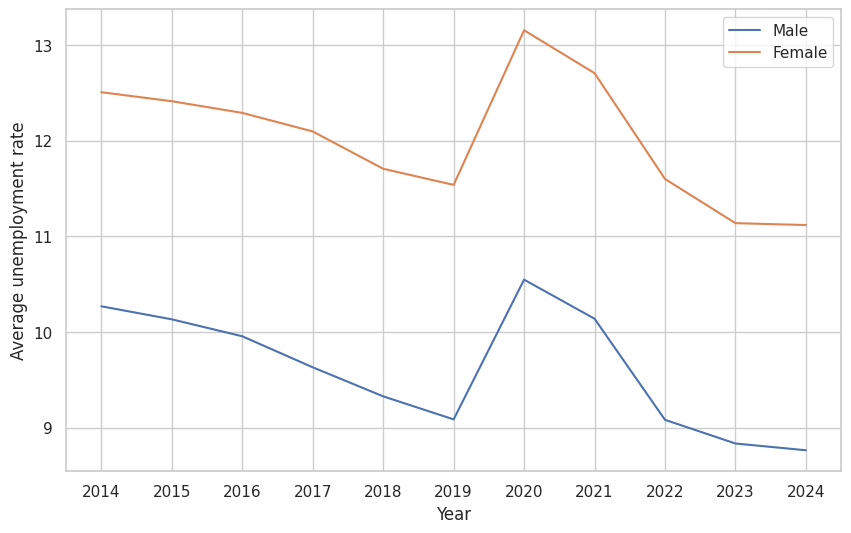

In [ ]:
merged_df = pd.merge(m_avg_unemployment_per_year, f_avg_unemployment_per_year, on='Year')

# Plot the line chart
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the first line
sns.lineplot(data=merged_df, x='Year', y='AUR_x', label='Male')

# Plot the second line
sns.lineplot(data=merged_df, x='Year', y='AUR_y', label='Female')

#plt.title('Line Chart with Two Lines')  # Set the title of the plot
plt.xlabel('Year')  # Set the label for the x-axis
plt.ylabel('Average unemployment rate')  # Set the label for the y-axis
plt.legend()  # Show the legend

plt.show()  # Show the plot


##3. Combination Suicide mortality rate & unemployment rate

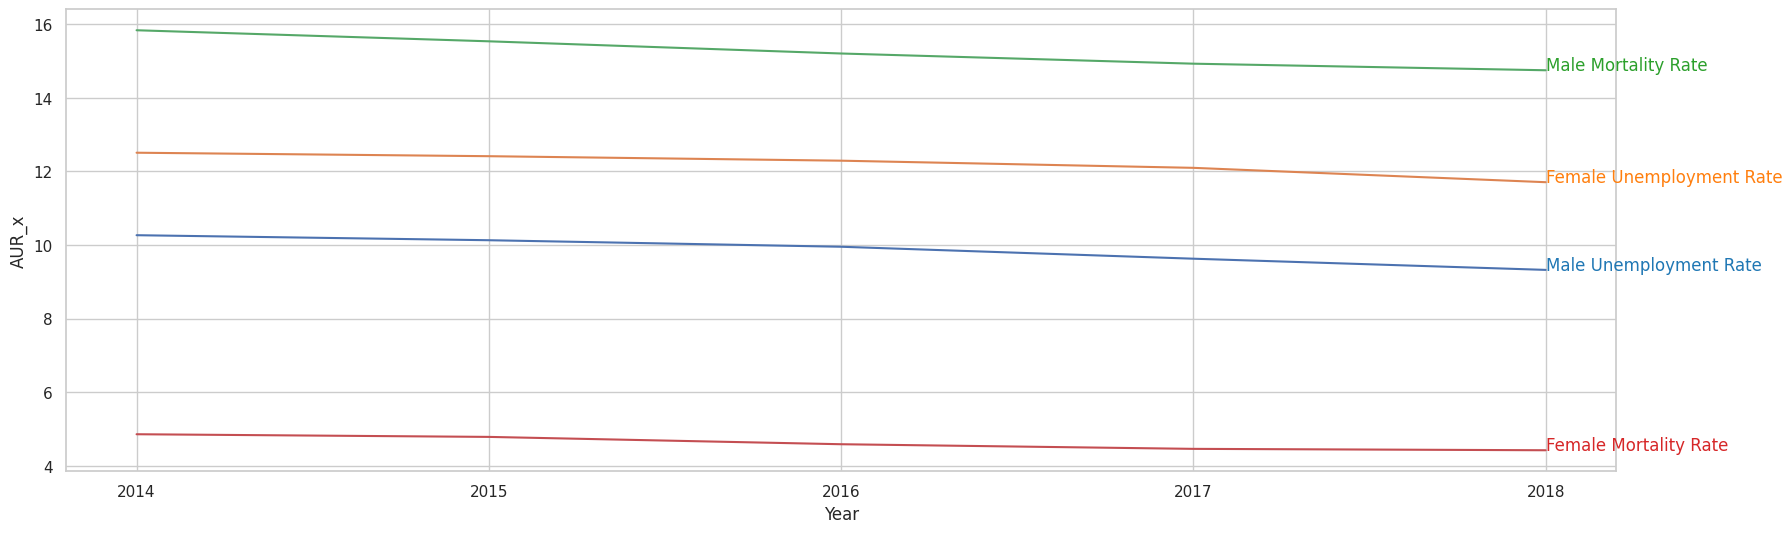

In [ ]:
#Get average of suicide mortality rate from 2014 - 2018
df_filtered2 = smr_df[(smr_df['DIM_TIME'] >= 2014) & (smr_df['DIM_TIME'] <= 2018)]

male_data_suicide = df_filtered2[df_filtered2['DIM_SEX'] == 'Male']

# Group the data by 'Year' and 'Sex', then calculate the mean mortality
m_avg_mortality_per_year = male_data_suicide.groupby(['DIM_TIME'])['VALUE_NUMERIC'].mean().reset_index()

#print(m_avg_mortality_per_year)


#Get average of suicide mortality rate from 2014 - 2018
df_filtered3 = smr_df[(smr_df['DIM_TIME'] >= 2014) & (smr_df['DIM_TIME'] <= 2018)]

female_data_suicide = df_filtered2[df_filtered2['DIM_SEX'] == 'Female']

# Group the data by 'Year' and 'Sex', then calculate the mean mortality
f_avg_mortality_per_year = female_data_suicide.groupby(['DIM_TIME'])['VALUE_NUMERIC'].mean().reset_index()

#print(m_avg_mortality_per_year)


merged_df2 = pd.merge(m_avg_mortality_per_year, f_avg_mortality_per_year, on='DIM_TIME')
merged_df2 = merged_df2.rename(columns={'DIM_TIME': 'Year', 'VALUE_NUMERIC_x': 'AMR_xM', 'VALUE_NUMERIC_y': 'AMR_xF'})
merged_df2['Year'] = merged_df2['Year'].astype(str)

#print(merged_df2)


merged_unemployment_mortality = pd.merge(merged_df2, merged_df, on='Year')
#print(merged_unemployment_mortality)


# Plot the line chart
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot the first line (Male Unemployment Rate)
sns.lineplot(data=merged_unemployment_mortality, x='Year', y='AUR_x', label='Male Unemployment Rate', legend=False)
# Annotate the line with its label
plt.text(merged_unemployment_mortality['Year'].iloc[-1], merged_unemployment_mortality['AUR_x'].iloc[-1], 'Male Unemployment Rate', color='tab:blue')

# Plot the second line (Female Unemployment Rate)
sns.lineplot(data=merged_unemployment_mortality, x='Year', y='AUR_y', label='Female Unemployment Rate', legend=False)
# Annotate the line with its label
plt.text(merged_unemployment_mortality['Year'].iloc[-1], merged_unemployment_mortality['AUR_y'].iloc[-1], 'Female Unemployment Rate', color='tab:orange')

# Plot the third line (Male Mortality Rate)
sns.lineplot(data=merged_unemployment_mortality, x='Year', y='AMR_xM', label='Male Mortality Rate', legend=False)
# Annotate the line with its label
plt.text(merged_unemployment_mortality['Year'].iloc[-1], merged_unemployment_mortality['AMR_xM'].iloc[-1], 'Male Mortality Rate', color='tab:green')

# Plot the fourth line (Female Mortality Rate)
sns.lineplot(data=merged_unemployment_mortality, x='Year', y='AMR_xF', label='Female Mortality Rate', legend=False)
# Annotate the line with its label
plt.text(merged_unemployment_mortality['Year'].iloc[-1], merged_unemployment_mortality['AMR_xF'].iloc[-1], 'Female Mortality Rate', color='tab:red')


#plt.title('Line Chart with Two Lines')  # Set the title of the plot
plt.xlabel('Year')  # Set the label for the x-axis
#plt.ylabel('Average unemployment rate')  # Set the label for the y-axis
#plt.legend()  # Show the legend

plt.show()  # Show the plot



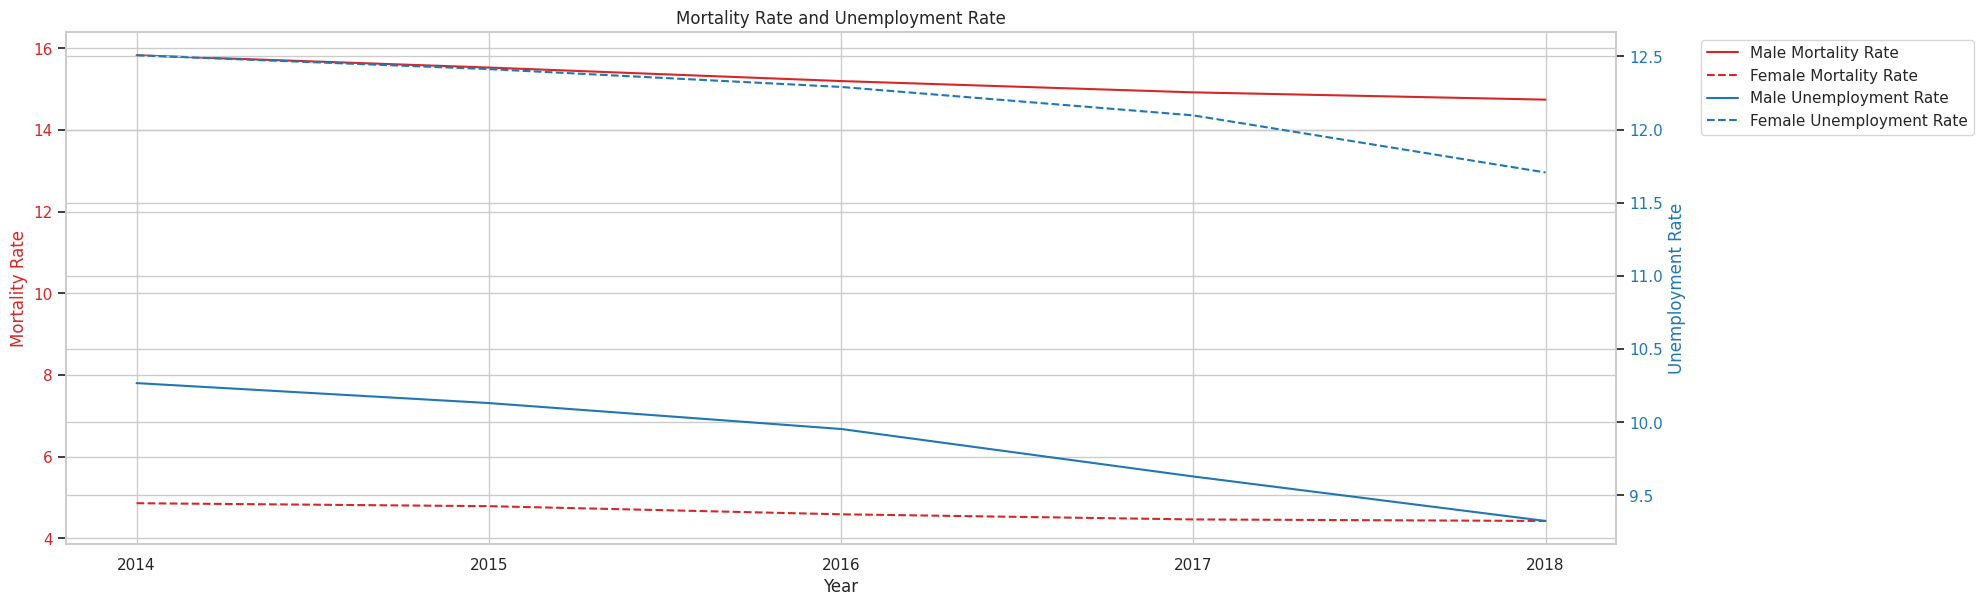

In [ ]:
# Example data
years = merged_unemployment_mortality['Year']
male_mortality_rate = merged_unemployment_mortality['AMR_xM']
female_mortality_rate = merged_unemployment_mortality['AMR_xF']
male_unemployment_rate = merged_unemployment_mortality['AUR_x']
female_unemployment_rate = merged_unemployment_mortality['AUR_y']

# Adjust the figure size
fig, ax1 = plt.subplots(figsize=(20, 6))  # Adjust width and height as needed

# Plotting mortality rate for males and females on the first Y-axis (left)
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mortality Rate', color=color)
ax1.plot(years, male_mortality_rate, color=color, label='Male Mortality Rate')
ax1.plot(years, female_mortality_rate, color=color, label='Female Mortality Rate', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second Y-axis (right) for unemployment rate for males and females
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate', color=color)
ax2.plot(years, male_unemployment_rate, color=color, label='Male Unemployment Rate')
ax2.plot(years, female_unemployment_rate, color=color, linestyle='--', label='Female Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',bbox_to_anchor=(1.05, 1))

fig.tight_layout()
plt.title('Mortality Rate and Unemployment Rate')  # Set the title of the plot

plt.show()

##4. Scatterplot test

<Axes: xlabel='YEAR', ylabel='VALUE'>

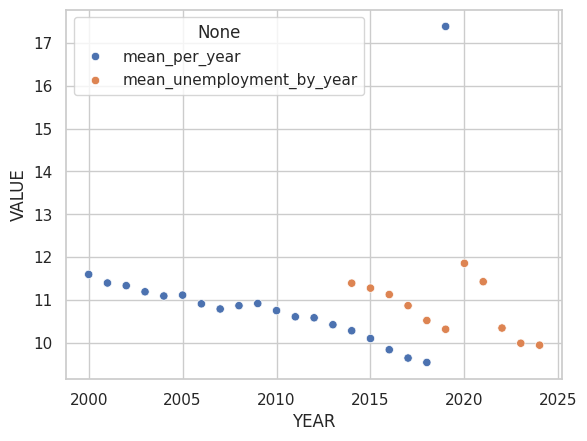

In [ ]:
# import suicide mortality rate.csv
smr_df = pd.read_csv('https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/Suicide%20mortality%20rate.csv')
# drop unnessecary columns
to_drop = ['IND_UUID', 'IND_NAME', 'IND_CODE', 'DIM_TIME_TYPE', 'DIM_AGE', 'DIM_VALUE_TYPE', 'DIM_PUBLISH_STATE_CODE', 'VALUE_NUMERIC_LOWER', 'VALUE_NUMERIC_UPPER']
df_clean = smr_df.drop(to_drop, axis='columns')
# rename columns
df_clean = df_clean.rename(columns={'GEO_NAME_SHORT': 'COUNTRY', 'DIM_TIME':'YEAR', 'DIM_SEX':'SEX'})
# Filter out rows where column 'SEX' does not equal 'Total'
df_filtered = df_clean[df_clean['SEX'] == 'Total']
mean_per_year = df_filtered.groupby('YEAR')['VALUE_NUMERIC'].mean().reset_index()

# Umbenennen der Spalte
mean_per_year = mean_per_year.rename(columns={'VALUE_NUMERIC': 'VALUE'})
#print(mean_per_year)




# import global unemployment data.csv
gud_df = pd.read_csv('https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/global_unemployment_data.csv')
# drop unnessecary columns
#print(gud_df)
drop = ['indicator_name','sex','age_categories','age_group']
gud_clean = gud_df.drop(drop, axis='columns')
# rename columns
gud_clean = gud_clean.rename(columns={'country_name': 'COUNTRY'})
#print(gud_clean)

# Melt DataFrame, um die Arbeitslosenquoten pro Jahr zu vereinheitlichen
melted_data = pd.melt(gud_clean, id_vars=['COUNTRY'], var_name='YEAR', value_name='UER')

# Konvertieren der 'Jahr'-Spalte in numerischen Typ
melted_data['YEAR'] = pd.to_numeric(melted_data['YEAR'])

# Gruppieren nach 'Jahr' und Berechnung des Mittelwerts der Arbeitslosenquote für jedes Jahr
mean_unemployment_by_year = melted_data.groupby('YEAR')['UER'].mean().reset_index()

# Umbenennen der Spalte
mean_unemployment_by_year.rename(columns={'UER': 'VALUE'}, inplace=True)

# Ausgabe des Ergebnisses
#print(mean_unemployment_by_year)

#merged_data = pd.merge(mean_per_year, mean_unemployment_by_year, on=['YEAR', 'YEAR'])
#print(merged_data)
#sns.scatterplot(data=merged_data, x='UER', y='VALUE_NUMERIC')


# Kombinieren der beiden DataFrames
combined_data = pd.concat([mean_per_year, mean_unemployment_by_year], keys=['mean_per_year', 'mean_unemployment_by_year'])
# Erstellen des Scatterplots
sns.scatterplot(data=combined_data, x='YEAR', y='VALUE', hue=combined_data.index.get_level_values(0))


## 5. Scatterplot for Suicide and BIP Test

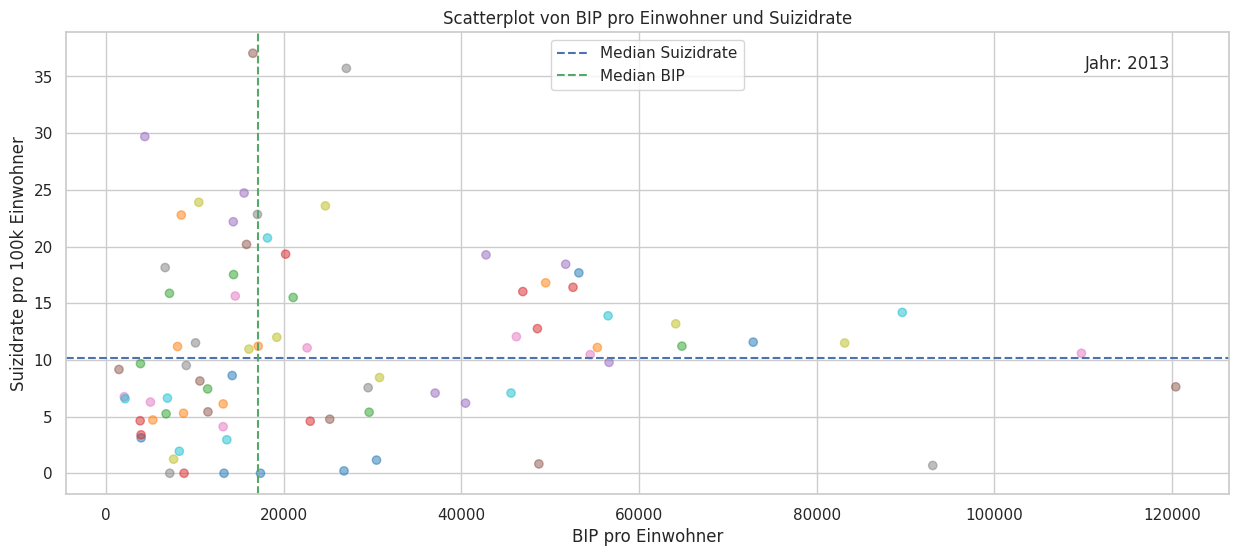

In [ ]:
# import suicide .csv from github
df = pd.read_csv('https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/suicide.csv')
'''
df.info() # get information about the dataset

df.shape # show the amount of rows and columns

df.head()
'''
# Spalten auswählen, die gruppiert werden sollen
columns_to_group = ['country', 'year', 'gdp_per_capita ($)']

# Dictionary, das für jede Spalte die entsprechende Aggregatfunktion angibt
aggregations = {
    'suicides/100k pop': 'mean',  # 'mean' für Durchschnitt
    # Weitere Spalten und Aggregatfunktionen können hier hinzugefügt werden
}

# Gruppieren nach Land und Anwenden der Aggregatfunktionen
grouped_data = df.groupby(columns_to_group).agg(aggregations)

# Zurücksetzen des Index, damit Land und Jahr wieder zu Spalten werden
grouped_data.reset_index(inplace=True)

# Nun hast du nur noch eine Zeile pro Land und Jahr mit dem durchschnittlichen Suizidraten
grouped_data.head()


year_to_filter = 2013
filtered_data = grouped_data[grouped_data['year'] == year_to_filter]

# Mapping von Ländern zu numerischen Werten für die Farbskala
country_colors = {country: i for i, country in enumerate(filtered_data['country'].unique())}

# Farbwerte für den Scatterplot entsprechend der Länder festlegen
colors = [country_colors[country] for country in filtered_data['country']]

# Scatterplot erstellen
plt.figure(figsize=(15, 6))
plt.scatter(filtered_data['gdp_per_capita ($)'], filtered_data['suicides/100k pop'], c=colors, cmap='tab10', alpha=0.5)
'''
# Lineare Regression durchführen
z = np.polyfit(filtered_data['gdp_per_capita ($)'], filtered_data['suicides/100k pop'], 1)
p = np.poly1d(z)
# Trendlinie zeichnen
plt.plot(filtered_data['gdp_per_capita ($)'], p(filtered_data['gdp_per_capita ($)']), "r--")
'''
# Median der Suizidraten berechnen
median_suicide_rate = np.median(filtered_data['suicides/100k pop'])
# Medianlinie zeichnen
plt.axhline(y=median_suicide_rate, color='b', linestyle='--', label='Median Suizidrate')

# Median des BIPs berechnen
median_bip = np.median(filtered_data['gdp_per_capita ($)'])
# Medianlinie zeichnen
plt.axvline(x=median_bip, color='g', linestyle='--', label='Median BIP')

# Jahr im Plot anzeigen
plt.text(0.95, 0.95, f'Jahr: {year_to_filter}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

# Achsenbeschriftungen und Titel
plt.xlabel('BIP pro Einwohner')
plt.ylabel('Suizidrate pro 100k Einwohner')
plt.title('Scatterplot von BIP pro Einwohner und Suizidrate')

# Farblegende hinzufügen
#plt.colorbar(label='country')

plt.legend(loc='upper center')

# Plot anzeigen
plt.grid(True)
plt.show()


# Gesamte Suizidraten pro 100.000 Einwohner nach Land (2005-2021)

In [ ]:
import pandas as pd
import plotly.express as px

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

print(df.head())

# Altersklassen zusammenfassen
def zusammenfassen_alter(age):
    if age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        return "alle Altersklassen"
    else:
        return "Nicht klassifiziert"

# Funktion auf Altersklassen anwenden
df["age"] = df["age"].apply(zusammenfassen_alter)

# Daten filtern 2005 bis 2021
df_filtered = df[(df["year"] >= 2005) & (df["year"] <= 2021)]

# Gruppieren: Land und zusammengefasster Altersklasse, Summe der Suizidraten pro 100.000 Einwohner
df_gesamt = df_filtered.groupby(["country", "age"], as_index=False)["suicides/100k pop"].sum()

# Karte erstellen
fig = px.choropleth(df_gesamt,
                    locations="country",
                    locationmode="country names",
                    color="suicides/100k pop",
                    hover_name="country",
                    hover_data=["suicides/100k pop", "age"],
                    title="Gesamte Suizidraten pro 100.000 Einwohner nach Land (2005-2021)",
                    labels={"suicides/100k pop": "Gesamte Suizidrate pro 100k Einwohner", "country": "Land"},
                    color_continuous_scale=px.colors.sequential.Blues,  # Farbverlauf von blau nach weiß umgekehrt
                    range_color=(df_gesamt["suicides/100k pop"].max(), 0),  # Bereich für Farbskala umgekehrt
                    projection="natural earth",
                    template="plotly_white"  # Weißer Hintergrund für Länder ohne Angaben
                   )

# Layout
fig.update_geos(showcountries=True, countrycolor="black", showcoastlines=True, coastlinecolor="White", showland=True)
fig.update_layout(coloraxis_colorbar=dict(title="Gesamte Suizidrate pro 100k Einwohner"))
fig.show()




   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN     2,15,66,24,900   
1               5.19  Albania1987           NaN     2,15,66,24,900   
2               4.83  Albania1987           NaN     2,15,66,24,900   
3               4.59  Albania1987           NaN     2,15,66,24,900   
4               3.28  Albania1987           NaN     2,15,66,24,900   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2               796.0     Generation X  
3               79

In [ ]:
# Daten nach Suizidraten sortieren (absteigend)
df_gesamt_sorted = df_gesamt.sort_values(by="suicides/100k pop", ascending=False)

# Tabelle erstellen
ranking_table = df_gesamt_sorted.reset_index(drop=True)
ranking_table.columns = ["Land", "Alter", "Suizidrate pro 100k Einwohner"]

# Ranking anzeigen
print("Ranking der Länder nach Suizidrate pro 100k Einwohner:")
ranking_table.head()



Ranking der Länder nach Suizidrate pro 100k Einwohner:


,Land,Alter,Suizidrate pro 100k Einwohner
0,Republic of Korea,alle Altersklassen,14932.294105
1,Lithuania,alle Altersklassen,5026.585617
2,Slovakia,alle Altersklassen,3799.915754
3,Russian Federation,alle Altersklassen,3624.955292
4,Hungary,alle Altersklassen,3620.116298


# Suizidrate pro Geschlecht (2005 bis 2021)

In [ ]:
import pandas as pd
import plotly.express as px

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

# Altersklassen zusammenfassen
def zusammenfassen_alter(age):
    if age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        return "alle Altersgruppen"
    else:
        return "Nicht klassifiziert"

# Funktion auf Altersklassen anwenden
df["age"] = df["age"].apply(zusammenfassen_alter)

# Dictionary für die Farben von männlich und weiblich
colors = {"male": "blue", "female": "hotpink"}

# Boxplots für jedes Jahr erstellen
for year in range(2005, 2021):
    df_year = df[df["year"] == year]

    # Boxplots erstellen
    fig = px.box(df_year, x="age", y="suicides_no", color="sex",
                 labels={"suicides_no": "Anzahl Suizide", "age": "Pro Geschlecht"},
                 category_orders={"age": ["alle Altersgruppen", "Nicht klassifiziert"]},
                 color_discrete_map=colors,
                 template="plotly_white",
                 title=f"Suizide nach Geschlecht (Jahr {year})",
                 hover_data={"sex": False, "age": False, "country": True}
                )

    # Switzerland hervorheben
    fig.update_traces(marker=dict(color="black"), selector=dict(country="Switzerland"))

    # Boxplot anpassen für Übersichtlichkeit
    for trace in fig.data:
        fig.update_traces(marker=dict(opacity=0.5), selector=dict(type="box"))
        fig.update_traces(boxmean="sd", selector=dict(type="box"))
        fig.update_traces(notched=True, selector=dict(type="box"))
        fig.update_traces(marker=dict(color="red"), selector=dict(type="scatter", name="Outliers"))

    # Layout anpassen für Subplots
    fig.update_layout(
        yaxis_title="Suizide nach Geschlecht",
        legend_title="Geschlecht",
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
        barmode="group",
        margin=dict(l=20, r=20, t=40, b=20),
        height=600,
        width=800,
        grid=dict(rows=1, columns=2),
        showlegend=False
    )

    # Subplots erstellen
    fig.update_traces(marker_line_width=2, selector=dict(type="box"))

    fig.show()


In [ ]:
import pandas as pd

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df_suicide = pd.read_csv(url)

# Gruppierung nach Jahr und Geschlecht, Summe der Suizidraten
df_gesamt = df_suicide.groupby(["year", "sex"])["suicides/100k pop"].sum().reset_index()

# Durchschnitt der Suizidraten pro Geschlecht für jedes Jahr berechnen
df_avg = df_gesamt.groupby("sex")["suicides/100k pop"].mean().reset_index()

# Suizidraten pro Geschlecht für das erste und letzte Jahr erhalten
suicide_rates_first_year = df_gesamt[df_gesamt["year"] == df_gesamt["year"].min()].groupby("sex")["suicides/100k pop"].mean()
suicide_rates_last_year = df_gesamt[df_gesamt["year"] == df_gesamt["year"].max()].groupby("sex")["suicides/100k pop"].mean()

# Vergleichen, ob die Suizidraten gestiegen oder gefallen sind
for sex in df_avg["sex"]:
    if suicide_rates_last_year.loc[sex] > suicide_rates_first_year.loc[sex]:
        print(f"Die Suizidrate für {sex} ist gestiegen.")
    elif suicide_rates_last_year.loc[sex] < suicide_rates_first_year.loc[sex]:
        print(f"Die Suizidrate für {sex} ist gesunken.")
    else:
        print(f"Die Suizidrate für {sex} hat sich nicht geändert.")





Die Suizidrate für female ist gesunken.
Die Suizidrate für male ist gesunken.


# Suiziderate pro Geschlecht auf 100k Einwohner mit Vergleich zur Schweiz

In [ ]:
import pandas as pd
import plotly.express as px

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

# Altersklassen zusammenfassen
def zusammenfassen_alter(age):
    if age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        return "alle Altersgruppen"
    else:
        return "Nicht klassifiziert"

# Funktion auf Altersklassen anwenden
df["age"] = df["age"].apply(zusammenfassen_alter)

# Gruppieren nach Jahr, Land, Geschlecht und Summe der Suizide pro 100.000 Einwohner berechnen
df_sum = df.groupby(["year", "country", "sex"], as_index=False)["suicides/100k pop"].sum()

# Daten für Jahre zwischen 2005 und 2021 filtern
df_sum_filtered = df_sum[(df_sum["year"] >= 2005) & (df_sum["year"] <= 2021)]

# Liniendiagramm erstellen
fig = px.line(df_sum_filtered, x="year", y="suicides/100k pop", color="country", facet_col="sex",
              labels={"suicides/100k pop": "Suizide pro 100k Einwohner", "year": "Jahr"},
              template="plotly_white",
              color_discrete_map=colors
             )
# Layout anpassen
fig.update_layout(
    title="Entwicklung der Suizide pro 100k Einwohner nach Land und Geschlecht (2005-2021)",
    yaxis_title="Suizide pro 100k Einwohner",
    legend_title="Land",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    margin=dict(l=20, r=20, t=40, b=20),
    height=800,
    width=1200
)

fig.show()







# Männlich und weiblich von 2005 bis 2021 mit Hinweis Schweiz

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

# Altersklassen zusammenfassen
def zusammenfassen_alter(age):
    if age in ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]:
        return "alle Altersgruppen"
    else:
        return "Nicht klassifiziert"

# Funktion auf Altersklassen anwenden
df["age"] = df["age"].apply(zusammenfassen_alter)

# Dictionary für die Farben von männlich und weiblich
colors = {"male": "navy", "female": "hotpink"}

# Daten nach Geschlecht und Zeitraum filtern
df_male = df[(df["sex"] == "male") & (df["year"] >= 2005) & (df["year"] <= 2021)]
df_female = df[(df["sex"] == "female") & (df["year"] >= 2005) & (df["year"] <= 2021)]

# Maximalen und minimalen Wert für die Y-Achse bestimmen
y_min = min(df["suicides_no"].min(), df_female["suicides_no"].min(), df_male["suicides_no"].min())
y_max = max(df["suicides_no"].max(), df_female["suicides_no"].max(), df_male["suicides_no"].max())

# Liniendiagramm für Suizidzahlen in der Schweiz erstellen
df_switzerland = df[(df["country"] == "Switzerland") & (df["year"] >= 2005) & (df["year"] <= 2021)]
df_switzerland["age"] = "alle Altersgruppen"  # Altersklassen für die Schweiz zusammenfassen

# Boxplots für männlich erstellen
fig_male = px.box(df_male, x="year", y="suicides_no",
                  labels={"suicides_no": "Anzahl Suizide", "year": "Jahr"},
                  color="age",
                  category_orders={"age": ["alle Altersgruppen", "Nicht klassifiziert"]},
                  color_discrete_map=colors,
                  template="plotly_white",
                  title="Suizide nach Geschlecht (Männlich, 2005-2021)",
                  hover_data={"sex": False, "age": False, "country": True}
                 )

# Boxplot anpassen für Übersichtlichkeit
for trace in fig_male.data:
    fig_male.update_traces(marker=dict(opacity=0.5), selector=dict(type="box"))
    fig_male.update_traces(boxmean="sd", selector=dict(type="box"))
    fig_male.update_traces(notched=True, selector=dict(type="box"))
    fig_male.update_traces(marker=dict(color="red"), selector=dict(type="scatter", name="Outliers"))

# Layout anpassen
fig_male.update_layout(
    yaxis_title="Suizide (Männlich)",
    legend_title="Altersgruppen",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    barmode="group",
    margin=dict(l=20, r=20, t=40, b=20),
    height=600,
    width=800,
    showlegend=True,
    yaxis=dict(range=[y_min, y_max]),
)

# Annotations für das Liniendiagramm in den Boxplot einfügen (Männlich)
annotations_male = []
for year, suicides in zip(df_switzerland["year"], df_switzerland["suicides_no"]):
    annotations_male.append(dict(x=year, y=suicides, xref='x', yref='y', text="", showarrow=True, arrowhead=1, ax=0, ay=-40,
                                 font=dict(color="black", size=10), bgcolor="white", opacity=0.7))
fig_male.update_layout(annotations=annotations_male)

# Boxplots für weiblich erstellen
fig_female = px.box(df_female, x="year", y="suicides_no",
                    labels={"suicides_no": "Anzahl Suizide", "year": "Jahr"},
                    color="age",
                    category_orders={"age": ["alle Altersgruppen", "Nicht klassifiziert"]},
                    color_discrete_map=colors,
                    template="plotly_white",
                    title="Suizide nach Geschlecht (Weiblich, 2005-2021)",
                    hover_data={"sex": False, "age": False, "country": True}
                   )

# Boxplot anpassen für Übersichtlichkeit
for trace in fig_female.data:
    fig_female.update_traces(marker=dict(opacity=0.5), selector=dict(type="box"))
    fig_female.update_traces(boxmean="sd", selector=dict(type="box"))
    fig_female.update_traces(notched=True, selector=dict(type="box"))
    fig_female.update_traces(marker=dict(color="red"), selector=dict(type="scatter", name="Outliers"))

# Layout anpassen
fig_female.update_layout(
    yaxis_title="Suizide (Weiblich)",
    legend_title="Altersgruppen",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    barmode="group",
    margin=dict(l=20, r=20, t=40, b=20),
    height=600,
    width=800,
    showlegend=True,
    yaxis=dict(range=[y_min, y_max]),
)

# Annotations für das Liniendiagramm in den Boxplot einfügen (Weiblich)
annotations_female = []
for year, suicides in zip(df_switzerland["year"], df_switzerland["suicides_no"]):
    annotations_female.append(dict(x=year, y=suicides, xref='x', yref='y', text="", showarrow=True, arrowhead=1, ax=0, ay=-40,
                                 font=dict(color="black", size=10), bgcolor="white", opacity=0.7))
fig_female.update_layout(annotations=annotations_female)

# Grafiken anzeigen
fig_male.show()
fig_female.show()



<ipython-input-23-896da2578266>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Stacked Bar nach Altersklasse pro 1ook Einwohner

In [ ]:
import pandas as pd
import plotly.express as px

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

# Filtern der Daten für die Jahre 2005 bis 2021
df = df[(df["year"] >= 2005) & (df["year"] <= 2021)]

# Pro 100k Einwohner berechnen
df["suicides_per_100k"] = df["suicides/100k pop"]

# Dictionary für die Farben der Altersklassen
colors = {"5-14 years": "purple", "15-24 years": "blue",
          "25-34 years": "green", "35-54 years": "yellow",
          "55-74 years": "orange", "75+ years": "red"}

# Sortieren der Altersgruppen
age_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]

# Gruppieren nach Jahr und Altersklasse und Summieren der Suizide pro 100k Einwohner
grouped = df.groupby(["year", "age"])["suicides_per_100k"].sum().reset_index()

# Um die richtige Reihenfolge sicherzustellen, wandeln wir die "age"-Spalte in einen kategorischen Datentyp um
grouped["age"] = pd.Categorical(grouped["age"], categories=age_order, ordered=True)

# Stacked Bar Plot erstellen
fig = px.bar(grouped, x="year", y="suicides_per_100k", color="age",
             labels={"suicides_per_100k": "Suizide pro 100k Einwohner", "year": "Jahr"},
             color_discrete_map=colors,
             title="Stacked Bar for All Countries and Age Groups (2005-2021)",
             height=600,
             width=1200
            )

# Layout anpassen
fig.update_layout(
    barmode="stack",
    xaxis_title="Jahr",
    yaxis_title="Suizide pro 100k Einwohner",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    margin=dict(l=20, r=20, t=40, b=20),
    showlegend=True
)

fig.show()




In [ ]:
import pandas as pd
import plotly.express as px

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df = pd.read_csv(url)

# Filtern der Daten für die Jahre 2005 bis 2021
df = df[(df["year"] >= 2005) & (df["year"] <= 2021)]

# Pro 100k Einwohner berechnen
df["suicides_per_100k"] = df["suicides/100k pop"]

# Dictionary für die Farben der Altersklassen
colors = {"5-14 years": "#08306b", "15-24 years": "#08519c",
          "25-34 years": "#2171b5", "35-54 years": "#4292c6",
          "55-74 years": "#6baed6", "75+ years": "#9ecae1"}

# Sortieren der Altersgruppen
age_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]

# Gruppieren nach Jahr und Altersklasse und Summieren der Suizide pro 100k Einwohner
grouped = df.groupby(["year", "age"])["suicides_per_100k"].sum().reset_index()

# Um die richtige Reihenfolge sicherzustellen, wandeln wir die "age"-Spalte in einen kategorischen Datentyp um
grouped["age"] = pd.Categorical(grouped["age"], categories=age_order, ordered=True)

# Berechnen der prozentualen Anteile für jedes Jahr und auf ganze Zahlen runden
grouped["suicides_percent"] = grouped.groupby("year")["suicides_per_100k"].transform(lambda x: (x / x.sum()) * 100)
grouped["suicides_percent"] = grouped["suicides_percent"].round()

# 100% Stacked Bar Plot erstellen
fig = px.bar(grouped, x="year", y="suicides_percent", color="age",
             labels={"suicides_percent": "Prozentualer Anteil der Suizide pro Altersgruppe (%)", "year": "Jahr"},
             color_discrete_map=colors,
             title="100% Stacked Bar for All Countries and Age Groups (2005-2021)",
             height=600,
             width=1200,
             text=grouped["suicides_percent"].astype(str) + '%',  # Hinzufügen der prozentualen Werte als Text
            )

# Layout anpassen
fig.update_layout(
    barmode="stack",
    xaxis_title="Jahr",
    yaxis_title="Prozentualer Anteil der Suizide pro Altersgruppe (%)",
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    margin=dict(l=20, r=20, t=40, b=20),
    showlegend=True
)

fig.show()



In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import display, Image, HTML
from tabulate import tabulate
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import NullFormatter

# CSV von GitHub laden
url = "https://raw.githubusercontent.com/djetishi/BINA/main/TEST_Data/tst_suicide.csv"
df_suicide = pd.read_csv(url)

# 1. Clean-up df_suicide
# drop unnessecary columns
to_drop = ['country-year', 'HDI for year']
# check whether the column exists and if so drop it
for col in to_drop:
    if col in df_suicide.columns:
        df_suicide.drop(columns=[col], inplace=True)

#rename column
df_suicide = df_suicide.rename(columns={'suicides/100k pop': 'suicides/100k', 'gdp_per_capita ($)':'gdp_per_capita', ' gdp_for_year ($) ': 'gdp_for_year'})

# Zuerst in String umwandeln
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].astype(str)
# Dann Tausendertrennzeichen entfernen und in Float umwandeln
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].str.replace(r'\,', '').astype(float)
# Dann in Integer umwandeln
df_suicide['gdp_for_year'] = df_suicide['gdp_for_year'].astype(int)

# Umwandeln von float nach Int für die suicides_no Spalte
df_suicide['suicides_no'] = df_suicide['suicides_no'].fillna(0).astype(int)

# Convert year column to datetime format
df_suicide['year'] = pd.to_datetime(df_suicide['year'], format='%Y')

# check column data types
#df_suicide.info()

# Extract only the year and update the 'year' column
df_suicide['year'] = pd.to_datetime(df_suicide['year'].dt.year, format='%Y')

# confirm if data type is still correct
#df_suicide.info()

# Create datetime objects for the start and end years
start_year = datetime.datetime(2005, 1, 1)
end_year = datetime.datetime(2022, 12, 31)

# Filter the DataFrame for years between 2005 and 2021
dfc_suicide = df_suicide[(df_suicide['year'] >= start_year) & (df_suicide['year'] <= end_year)]





# Step 1: Berechnung BIP pro Jahr und Land
total_gdp = dfc_suicide.groupby(['country', 'year'])['gdp_for_year'].mean()

# Step 2: Berechnung Totale Population pro Jahr und Land
total_population = dfc_suicide.groupby(['country', 'year'])['population'].sum()
#print(total_population)

# Step 3: Berechnung des BIPs pro Einwohner
gdp_per_capita = total_gdp / total_population

# Step 4: Berechnung BIP pro 100'000 Einwohner
gdp_per_100k = (gdp_per_capita * 100000).astype(int)

#gdp_per_100k = gdp_per_100k.round(0).astype(int)

#pd.options.display.float_format = '{:.3f}'.format

# Gruppierung von gdp_per_100k pro Jahr und Berechnung des Durchschnitts
average_gdp_per_100k = gdp_per_100k.groupby('year').mean()
# Benennung der Spalte
average_gdp_per_100k = average_gdp_per_100k.reset_index(name='average_gdp_per_100k')
divisor = 1000000000
average_gdp_per_100k['average_gdp_per_100k'] = average_gdp_per_100k['average_gdp_per_100k'] / divisor

# Gruppierung von gdp_suicide_per_100k pro Jahr und Berechnung des Durchschnitts
average_suicides_per_100k = dfc_suicide.groupby(['year'])['suicides/100k'].mean()
# Benennung der Spalte
average_suicides_per_100k = average_suicides_per_100k.reset_index(name='average_suicides_per_100k')


merged_df = pd.merge(average_gdp_per_100k, average_suicides_per_100k, on='year')
#print(merged_df)


# Datetime-Objekt erstellen
merged_df['year'] = pd.to_datetime(merged_df['year'])
# Größe des Diagramms festlegen
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=merged_df['year'].dt.year, y='average_gdp_per_100k', data=merged_df)
ax.plot(merged_df['average_suicides_per_100k'], color='red', marker='o', linestyle='-', linewidth=2)

ax.annotate('Ab 2016 massiv weniger Daten \nfür das BIP zur Verfügung',
            xy=(11, 3), xycoords='data',
            xytext=(-10, 90), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom',bbox = dict(boxstyle="round", fc="0.8"))

# Y-Achse Grenzen und Intervall festlegen
plt.ylim(0, 20)  # Min und Max für die Y-Achse
plt.yticks(range(0, 20, 1))  # Intervall für die Y-Achse

# Gitter hinzufügen
plt.grid(True, linestyle='--')

# Diagramm beschriften
plt.xlabel('years')
plt.ylabel('Average GDP & Suicide rate per 100k')
plt.title('Balkendiagramm')


# Diagramm anzeigen
plt.show()

ValueError: could not convert string to float: '2,15,66,24,900'